In [1]:
# %pip install import_ipynb

%run Prepare_text/PrepareText.ipynb
%run Edit_Query/Edit_query.ipynb
%run Search/Search.ipynb
%run Index/Indexer.ipynb

# import Prepare_text.PrepareText
# import Edit_Query.Edit_query
# import Search.Search
# import Index.Indexer


def console():
    is_english = EditQuery.is_english
    
    file_reader = read_file("data/ted_talks.csv", 'data/Persian.xml')
    ep = EnglishPreprocessor()
    pp = PersianPreprocessor()
    eng_docs = [] 
    eng_docs = ep.preprocess(file_reader.read_csv_file_as_list())
    per_docs = []
    per_docs = pp.preprocess(file_reader.read_persian_xml_file_as_list())

    english_indexer = Indexer(docs_directory="Index/English_docs/", index_file="Index/files/English_index.pkl")
    persian_indexer = Indexer(docs_directory="Index/Persian_docs/", index_file="Index/files/Persian_index.pkl")
    
    print("Sections:")
    print(" 1: Preprcess")
    print("  Questions:")
    print("    1: Get text input and display its words after pre-processing")
    print("    2: Show high occurrence words for English and Persian docs")
    print()
    
    print(" 2: Indexing")
    print("  Questions:")
    print("    1: Index English and Persian docs")
    print("    2: Get term input and display its posting list")
    print("    3: Get term input and display its posting list with positions")
    print("    4: Get bigram input and display its posting list")  
    print()
    
    print(" 3: Compressing")
    print("  Questions:")
    print("    1: Compress Index with variable byte and show occupied memory before and after compression")
    print("    2: Compress Index with gamma code and show occupied memory before and after compression")
    print("    3: Store indexes in file and load them from file")
    
    print("    2: Show high occurrence words for English and Persian docs")
    print()
    
    print(" 4: Edit query")
    print("  Questions:")
    print("    1: Show edited query")
    print("    2: Calculate the jaccard distance of two words")
    print("    3: Calculate the edit distance of two words")
    print()
    
    print(" 1: Search")
    print("  Questions:")
    print("    1: Scored search in vector space with lnc-ltc method")
    print("    1: Proximity search with enterd K in vector space with lnc-ltc method")
    print() 
    
    print("Enter 'exit' to terminate.")
    
    
    while True:
        print()
        print("_____________________")
        
        section = input('Enter the section number:\n    ')
        question = input('Enter question number:\n    ')
        if section == '1':
            if question == '1':
#                 language = input('Enter Language(p for Persian, e for English):\n    ')
                text = input('Enter the text:\n    ')
                is_eng = is_english(text)
                if is_eng:
                    norm_text = EnglishPreprocessor().preprocess([text], is_query=True)
                else:
                    norm_text = PersianPreprocessor().preprocess([text], is_query=True)
                print('  ->', norm_text)
            elif question == '2':
                print(' ->', "High occurrence words in English docs are: ")
                e_high_acc_words = ep.get_high_accured_words()
                for k, v in e_high_acc_words.items():
                    print(k + ":", v, end=', ')
#                 print(e_high_acc_words)
                print('-----------------')
                print(' ->', "High occurrence words in Persian docs are: ")
                p_high_acc_words = pp.get_high_accured_words()
                for k, v in p_high_acc_words.items():
                    print(k + ":", v, end=', ')
#                 print(p_high_acc_words)
                print()
                
                fig, (ax1, ax2) = plt.subplots(2)
                plt.xticks(rotation=70)
                ax1.plot(list(e_high_acc_words.keys()), e_high_acc_words.values(), color='g')
                ax2.plot(list(p_high_acc_words.keys()), p_high_acc_words.values(), color='b')
                plt.show()
                
        elif section == '2':
            if question == '1':
                for doc_id in range(len(eng_docs)):
                    english_indexer.add_doc(eng_docs[doc_id], doc_id)
                for doc_id in range(len(per_docs)):
                    persian_indexer.add_doc(per_docs[doc_id], doc_id)
                print('  ->', 'Indexing is done.')
            elif question == '2':
#                 language = input('Enter Language(p for Persian, e for English):\n    ')
                term = input('Enter the term:\n    ')
                is_eng = is_english(term)
                if is_eng:
                    edited_term = EditQuery(term, english_indexer, ep, pp).edit_query()
                    print('  ->', english_indexer.get_posting(edited_term))
                else:
                    edited_term = EditQuery(term, persian_indexer, ep, pp).edit_query()
                    print('  ->', persian_indexer.get_posting(edited_term))
            elif question == '3':
                term = input('Enter the term:\n    ')
                is_eng = is_english(term)
                if is_eng:
                    edited_term = EditQuery(term, english_indexer, ep, pp).edit_query()
                    print('  ->', english_indexer.get_posting_with_positions(edited_term))
                else:
                    edited_term = EditQuery(term, persian_indexer, ep, pp).edit_query()
                    print('  ->', persian_indexer.get_posting_with_positions(edited_term))
            elif question == '4':
                bigram = input('Enter the bigram:\n    ')
                if len(bigram) != 2:
                    print(bigram, "is not a bigram.")
                    continue
                is_eng = is_english(bigram)
                if is_eng:
                    print('  ->', english_indexer.get_bigram_posting(bigram))
                else:
                    print('  ->', persian_indexer.get_bigram_posting(bigram))

        elif section == '3':
            print(' ->', "For English docs Indexer:")
            if question == '1':
                english_indexer.save_posting(file_name='Index/files/E_NotCompressed_index.txt')
                print("       Not compressed index size:", 
                      os.path.getsize('Index/files/E_NotCompressed_index.txt'), 'Bytes')
                english_indexer.save_posting(compression_type="VariableByte", 
                                             file_name='Index/files/E_VariableByte_index.txt')
                print("       Variable byte index size:", 
                      os.path.getsize('Index/files/E_VariableByte_index.txt'), 'Bytes')
            elif question == '2':
                print(' ->', "For English docs Indexer:")
                english_indexer.save_posting(file_name='Index/files/E_NotCompressed_index.txt')
                print("       Not compressed index size:", 
                      os.path.getsize('Index/files/E_NotCompressed_index.txt'), 'Bytes')
                english_indexer.save_posting(compression_type="GammaCode", 
                                             file_name='Index/files/E_GammaCode_index.txt')
                print("       Gamma code index size:", 
                      os.path.getsize('Index/files/E_GammaCode_index.txt'), 'Bytes')
            elif question == '3':
                english_indexer.save_posting(compression_type="NotCompressed", 
                                             file_name='Index/files/E_NotCompressed_index.txt')
                english_indexer.load_posting(compression_type="NotCompressed", 
                                             file_name='Index/files/E_NotCompressed_index.txt')
                print('       Positional index saved and loaded.')
                english_indexer.save_bigram_posting(file_name='Index/files/E_Bigram_index.txt')
                english_indexer.load_bigram_posting(file_name='Index/files/E_Bigram_index.txt')
                print('       Bigram index saved and loaded.')
            elif question == '4':
#                 english_indexer.save_index()
                english_indexer = Indexer.load("Index/files/English_index.pkl")
                print('       English index saved and loaded.')
            print() 
            print(' ->', "For Persian docs Indexer:")
            if question == '1':
                persian_indexer.save_posting(file_name='Index/files/P_NotCompressed_index.txt')
                print("       Not compressed index size:", 
                      os.path.getsize('Index/files/P_NotCompressed_index.txt'), 'Bytes')
                persian_indexer.save_posting(compression_type="VariableByte", 
                                             file_name='Index/files/P_VariableByte_index.txt')
                print("       Variable byte index size:", 
                      os.path.getsize('Index/files/P_VariableByte_index.txt'), 'Bytes')
            elif question == '2':
                persian_indexer.save_posting(file_name='Index/files/P_NotCompressed_index.txt')
                print("       Not compressed index size:", 
                      os.path.getsize('Index/files/P_NotCompressed_index.txt'), 'Bytes')
                persian_indexer.save_posting(compression_type="GammaCode", 
                                             file_name='Index/files/P_GammaCode_index.txt')
                print("       Gamma code index size:", 
                      os.path.getsize('Index/files/P_GammaCode_index.txt'), 'Bytes')
            elif question == '3':
                persian_indexer.save_posting(compression_type="NotCompressed", 
                                             file_name='Index/files/P_NotCompressed_index.txt')
                persian_indexer.load_posting(compression_type="NotCompressed", 
                                             file_name='Index/files/P_NotCompressed_index.txt')
                print('       Positional index saved and loaded.')
                persian_indexer.save_bigram_posting(file_name='Index/files/P_Bigram_index.txt')
                persian_indexer.load_bigram_posting(file_name='Index/files/P_Bigram_index.txt')
                print('       Bigram index saved and loaded.')
            elif question == '4':
#                 persian_indexer.save_index()
                persian_indexer = Indexer.load("Index/files/Persian_index.pkl")
                print('       Persian index saved and loaded.')
                
        elif section == '4':
            if question == '1':
                query = input('Enter the query:\n    ')
                is_eng = is_english(query)
                if is_eng:
                    query = EditQuery(query, english_indexer, ep, pp).edit_query()
                else:
                    query = EditQuery(query, persian_indexer, ep, pp).edit_query() 
                print('  ->', query)
            elif question == '2':
                w1 = input('Enter first word:\n    ')
                w2 = input('Enter second word:\n    ')
                print('  ->', EditQuery.jac_card(w1, w2))
            elif question == '3':
                w1 = input('Enter first word:\n    ')
                w2 = input('Enter second word:\n    ')
                print('  ->', EditQuery.edit_distance(w1, w2))
                
        elif section == '5':
            if question == '1':
                query = input('Enter the query:\n    ')
                parameter = input('Enter search field (title/description) or press Enter to skip:\n    ')
                while parameter and parameter != 'title' and parameter != 'description':
                    print(" Its not a valid parameter.")
                    parameter = input('Enter search field(title/description) or press Enter to skip:\n    ')
                if not parameter:
                    parameter = None

                is_eng = is_english(query)
                if is_eng:
                    query = EditQuery(query, english_indexer, ep, pp).edit_query()
                    docs_id = Searcher(english_indexer).search(query, parameter)
                    print('  Scored tf-idf Search result for "' + query + '" is:\n  ->', docs_id)
                    if len(docs_id) > 0:
                        doc_id = input("  Enter a doc_id to load and show the doc's content(press Enter to skip):\n         ")
                        while doc_id:
                            if doc_id.isnumeric() and int(doc_id) in english_indexer.all_docs:
                                print(file_reader.get_doc(int(doc_id), 'english'))
                            else:
                                print(' There is no doc with this id.')
                            print('------')
                            doc_id = input("     doc_id:\n         ")
                            
                    
                else:
                    query = EditQuery(query, persian_indexer, ep, pp).edit_query()
                    docs_id = Searcher(persian_indexer).search(query, parameter)
                    print('  Scored tf-idf Search result for "' + query + '" is:\n  ->', docs_id)
                    if len(docs_id) > 0:
                        doc_id = input("  Enter a doc_id to load and show the doc's content(press Enter to skip):\n         ")
                        while doc_id:
                            if doc_id.isnumeric() and int(doc_id) in persian_indexer.all_docs:
                                print(file_reader.get_doc(int(doc_id), 'persian'))
                            else:
                                print(' There is no doc with this id.')
                            print('------')
                            doc_id = input("     doc_id:\n         ")
            elif question == '2':
                query = input('Enter the query:\n    ')
                size = int(input('Enter the window size:\n    '))
                parameter = input('Enter search field (title/description) or press Enter to skip:\n    ')
                while parameter and parameter != 'title' and parameter != 'description':
                    print(" Its not a valid parameter.")
                    parameter = input('Enter search field(title/description) or press Enter to skip:\n    ')
                if not parameter:
                    parameter = None
                is_eng = is_english(query)
                if is_eng:
                    query = EditQuery(query, english_indexer, ep, pp).edit_query()
                    docs_id = Searcher(english_indexer).proximity_search(query, size, parameter)
                    print("  Proximity search with K =", size, "Search result for '" + query + "' is:\n  ->", docs_id)
                    if len(docs_id) > 0:
                        doc_id = input("  Enter a doc_id to load and show the doc's content(press Enter to skip):\n         ")
                        while doc_id:
                            if doc_id.isnumeric() and int(doc_id) in english_indexer.all_docs:
                                print(file_reader.get_doc(int(doc_id), 'english'))
                            else:
                                print(' There is no doc with this id.')
                            print('------')
                            doc_id = input("     doc_id:\n         ")
                else:
                    query = EditQuery(query, persian_indexer, ep, pp).edit_query()
                    print(query)
                    docs_id = Searcher(persian_indexer).proximity_search(query, size,parameter)
                    print("  Proximity search with K =", size, "Search result for '" + query + "' is:\n  ->", docs_id)
                    if len(docs_id) > 0:
                        doc_id = input("  Enter a doc_id to load and show the doc's content(press Enter to skip):\n         ")
                        while doc_id:
                            if doc_id.isnumeric() and int(doc_id) in persian_indexer.all_docs:
                                print(file_reader.get_doc(int(doc_id), 'persian'))
                            else:
                                print(' There is no doc with this id.')
                            print('------')
                            doc_id = input("     doc_id:\n         ")
                
        elif section == 'exit':
            break
        else:
            print('wrong input')

Sections:
 1: Preprcess
  Questions:
    1: Get text input and display its words after pre-processing
    2: Show high occurrence words for English and Persian docs

 2: Indexing
  Questions:
    1: Index English and Persian docs
    2: Get term input and display its posting list
    3: Get term input and display its posting list with positions
    4: Get bigram input and display its posting list

 3: Compressing
  Questions:
    1: Compress Index with variable byte and show occupied memory before and after compression
    2: Compress Index with gamma code and show occupied memory before and after compression
    3: Store indexes in file and load them from file
    2: Show high occurrence words for English and Persian docs

 4: Edit query
  Questions:
    1: Show edited query
    2: Calculate the jaccard distance of two words
    3: Calculate the edit distance of two words

 1: Search
  Questions:
    1: Scored search in vector space with lnc-ltc method
    1: Proximity search with ent

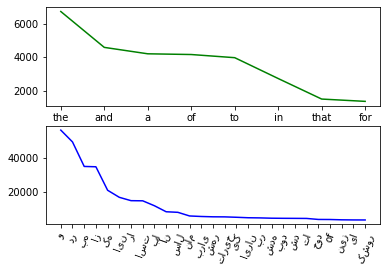


_____________________
Enter the section number:
    2
Enter question number:
    1
  -> Indexing is done.

_____________________
Enter the section number:
    2
Enter question number:
    2
Enter the term:
    purpose
  -> [9, 871, 899, 904, 1372, 1475, 1509, 1567, 1657, 1777, 1850, 1860, 2092, 2189, 2330, 2452]

_____________________
Enter the section number:
    purpose
Enter question number:
    
wrong input

_____________________
Enter the section number:
    2
Enter question number:
    3
Enter the term:
    purpose
  -> {9: {'title': [1], 'description': [11]}, 871: {'description': [5]}, 899: {'description': [18]}, 904: {'description': [20]}, 1372: {'description': [51]}, 1475: {'description': [28]}, 1509: {'description': [24]}, 1567: {'description': [47]}, 1657: {'description': [32]}, 1777: {'description': [33]}, 1850: {'description': [45]}, 1860: {'description': [13]}, 2092: {'description': [53]}, 2189: {'description': [29]}, 2330: {'description': [35]}, 2452: {'description': [9

     doc_id:
         

_____________________


In [ ]:
console()